# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat3"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.3222925662994385
Epoch 1, Loss 1.337551772594452
Epoch 2, Loss 1.318110167980194
Epoch 3, Loss 1.2905466556549072
Epoch 4, Loss 1.3201624155044556
Epoch 5, Loss 1.3639513850212097
Epoch 6, Loss 1.320998728275299
Epoch 7, Loss 1.297312617301941
Epoch 8, Loss 1.3439276218414307
Epoch 9, Loss 1.3589475750923157
Epoch 10, Loss 1.351154625415802
Epoch 11, Loss 1.323569655418396
Epoch 12, Loss 1.3397299647331238
Epoch 13, Loss 1.337311029434204
Epoch 14, Loss 1.3315042853355408
Epoch 15, Loss 1.3378651142120361
Epoch 16, Loss 1.3307400345802307
Epoch 17, Loss 1.3176226019859314
Epoch 18, Loss 1.3047152757644653
Epoch 19, Loss 1.2976881861686707
Epoch 20, Loss 1.3297695517539978
Epoch 21, Loss 1.2972675561904907
Epoch 22, Loss 1.3160881996154785
Epoch 23, Loss 1.284227967262268
Epoch 24, Loss 1.3285741806030273
Epoch 25, Loss 1.295096755027771
Epoch 26, Loss 1.3179441094398499
Epoch 27, Loss 1.275152862071991
Epoch 28, Loss 1.3091741800308228
Epoch 29, Loss 1.301252543926239
E

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

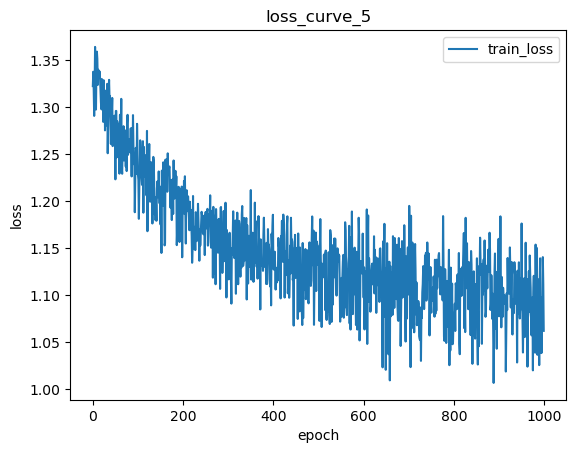

In [5]:
plt.figure()
plt.plot(losses, label='train_loss')
plt.title(f'loss_curve_{n}')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig(f'figures/{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[65, 14], [8, 9]]
Accuracy for class 0 = 82.27848101265823%
Accuracy for class 1 = 52.94117647058823%
Overall accuracy = 77.08333333333333%


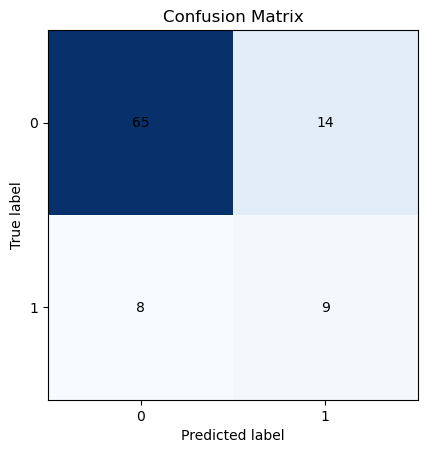

In [6]:
confustion_matrix = evaluate_model(model, training_dataset)
print(confustion_matrix)
confustion_matrix.print_accuracy()
confustion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

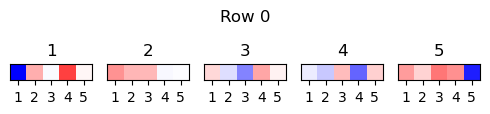

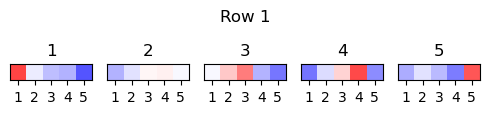

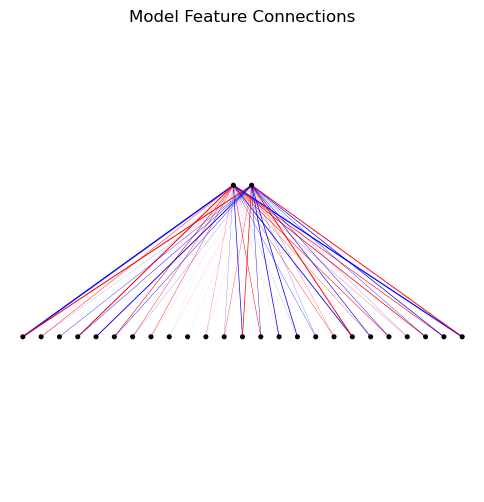

In [7]:
for i in range(len(layers)):
    for index in range(model.layers[i].weight.shape[0]):
        model.plot_heatmap_feature(i, index)
model.plot_connections()